## Extracting Text from Images using Google's Tesseract-OCR Engine
Reference article: https://medium.com/@nikhilwani05/extract-text-from-images-dccb3b66265f

In [22]:
# Import Libraries
import cv2 # I needed to install opencv-contrib-python in order to use the cv2.text module
import pytesseract
import matplotlib.pyplot as plt

In [23]:
# 1. load and read the image
img_path = 'data/tj2024.png'
img = cv2.imread(img_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Computer Vision library has a TextDetectorCNN class that is a text detection model. In order to use its detect method (that detects text), I need to instantiate an instance of the TextDetectorCNN class.

In [24]:
# I'm using the caffemodel and prototxt files from the links below
# TextDetector documentation: https://docs.opencv.org/4.x/d1/d66/classcv_1_1text_1_1TextDetectorCNN.html#details
# TextBoxes_icdar13.caffemodel:https://www.dropbox.com/s/g8pjzv2de9gty8g/TextBoxes_icdar13.caffemodel?dl=0
# textbox.prototxt: https://github.com/shimat/opencvsharp/blob/main/test/OpenCvSharp.Tests/_data/text/textbox.prototxt
tnn = cv2.text.TextDetectorCNN_create("textbox.prototxt", "TextBoxes_icdar13.caffemodel")
# Storing the textboxes in a variable
textboxes, _ = tnn.detect(img)

In [25]:
# Extract the text from each box in textboxes using the image_to_string method in pytesseract
extracted_text = ""
for box in textboxes:
    x, y, w, h = box
    roi = img[y:y+h, x:x+w]
    text = pytesseract.image_to_string(roi)
    extracted_text += text + "\n"

In [26]:
extracted_text = extracted_text.strip()
extracted_text

'CIpt\nStatior\n\nCHS]\n\n‘iqgested\n\nMANA,\n\nashier\n\nrt ime\n\nMPA bl\n\n\non 6/8/202\n\nst land,\n\natin\n\n4.\n\n\n(MEI\n\n6/\n\n\n18185\n\nEOP LUE\n\nAPrniank\n\n\na Wad\n\n44!\n\nual\n\nOnn\nRrnar\n\nWOW\n\n) on 6/8/2(\n\n08-11 1-\n\nLi,\n\n\n\n\n. VE\n\n240608.\n\nALI\n\n\nOL VOUT\n\n\n_\n\n—,\n\n——\n\n—2\n\n—_—\n\nMMT\n\nDate: 6/8/2024 1:47 py\nshier: Marwan\n\nJumper, 41] Day Pass\nOpen Jump\n\n2:00-2:30 on 6/8/2024\nJumper, Al] Day Pass\nOpen Jump\n\n2:00-2:30 on 6/8/2024\nJumper, All Day Pass\nOpen Jump\n\n2:00-2:30 on 6/8/2024\nJumper, Al] Day Pass\nOpen Jump .\n2:00-2:30 on 6/8/2024\nSacks\n\nSub Total:\n\nCn Pane Tray\n\n$20.70\n$20.7\n$20. 7¢\n$20.70\n\n$2.9\n$85.7\non -\n\nAL\n\nIni ter\n\nrrer\n\n1A _¢\n\n\nA)\n\np03\n\nKOC\n\nWEST\n\ni i Aes\n\n\n“Time W\n\nAU\n\nat way\n\nSuggested Gratuities\n\n4: 5% = $4.14 ($90.05)\nek: 10% = $8.28 ($94.19)\neek: 15% = $12.42 ($98.33)\n\npe Of Card: AMEX\nme On Card: VALUED CUSTOMER\n\n$90 .02)\n($94.9)\n\nJ AD\n\n103\n\n~PAD\n

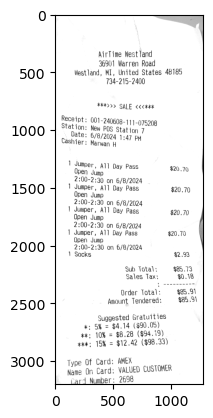

'CIpt\nStatior\n\nCHS]\n\n‘iqgested\n\nMANA,\n\nashier\n\nrt ime\n\nMPA bl\n\n\non 6/8/202\n\nst land,\n\natin\n\n4.\n\n\n(MEI\n\n6/\n\n\n18185\n\nEOP LUE\n\nAPrniank\n\n\na Wad\n\n44!\n\nual\n\nOnn\nRrnar\n\nWOW\n\n) on 6/8/2(\n\n08-11 1-\n\nLi,\n\n\n\n\n. VE\n\n240608.\n\nALI\n\n\nOL VOUT\n\n\n_\n\n—,\n\n——\n\n—2\n\n—_—\n\nMMT\n\nDate: 6/8/2024 1:47 py\nshier: Marwan\n\nJumper, 41] Day Pass\nOpen Jump\n\n2:00-2:30 on 6/8/2024\nJumper, Al] Day Pass\nOpen Jump\n\n2:00-2:30 on 6/8/2024\nJumper, All Day Pass\nOpen Jump\n\n2:00-2:30 on 6/8/2024\nJumper, Al] Day Pass\nOpen Jump .\n2:00-2:30 on 6/8/2024\nSacks\n\nSub Total:\n\nCn Pane Tray\n\n$20.70\n$20.7\n$20. 7¢\n$20.70\n\n$2.9\n$85.7\non -\n\nAL\n\nIni ter\n\nrrer\n\n1A _¢\n\n\nA)\n\np03\n\nKOC\n\nWEST\n\ni i Aes\n\n\n“Time W\n\nAU\n\nat way\n\nSuggested Gratuities\n\n4: 5% = $4.14 ($90.05)\nek: 10% = $8.28 ($94.19)\neek: 15% = $12.42 ($98.33)\n\npe Of Card: AMEX\nme On Card: VALUED CUSTOMER\n\n$90 .02)\n($94.9)\n\nJ AD\n\n103\n\n~PAD\n

In [28]:
plt.imshow(gray_img, cmap='gray')
plt.show()
extracted_text = extracted_text.strip()
extracted_text